In [1]:
# import relevant libraries
import json
from collections import Counter
import numpy as np
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad

import warnings
warnings.filterwarnings('ignore')

In [2]:
all_games = pd.read_csv("your file location")

In [51]:
print(np.unique(all_games["card"]))

['0' 'Red Card' 'Second Yellow' 'Yellow Card']


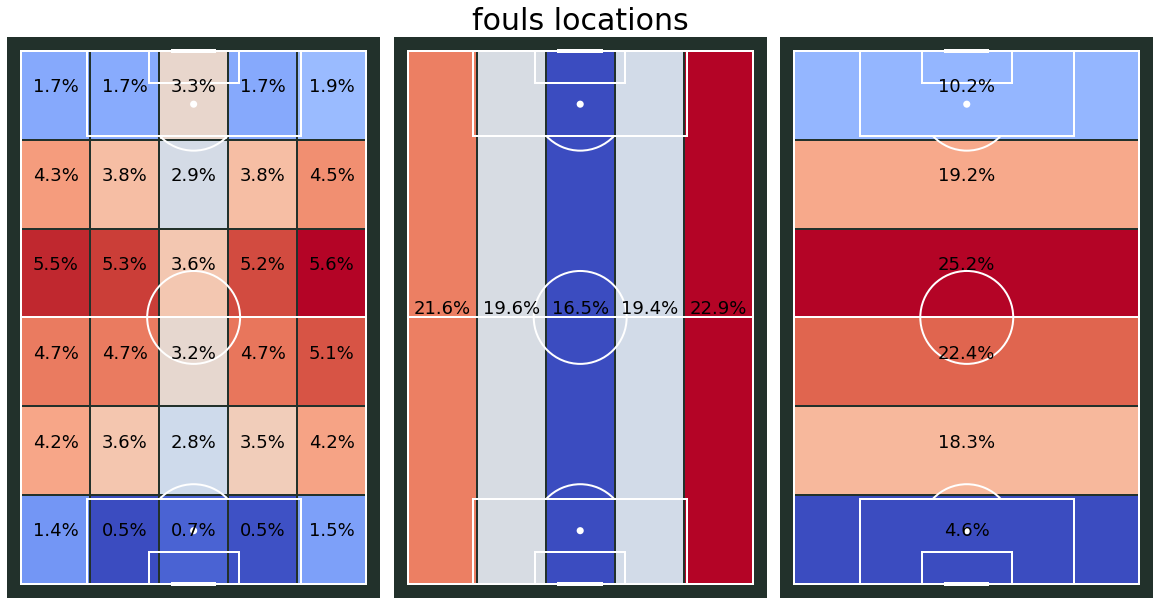

In [10]:
#ALL FOULS

from mplsoccer.pitch import Pitch

# setup pitch
pitch = Pitch(pitch_type = 'wyscout', figsize = (16, 9), layout = (1,3), line_zorder=2,
              pitch_color= '#22312b', line_color = 'white',orientation='vertical')
# draw
fig, ax = pitch.draw()
bins = [(6,5),(1,5),(6,1)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(all_games.x, all_games.y, statistic='count', bins = bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[i], cmap='coolwarm', edgecolors = '#22312b')
    
    # replace raw counts with percentages and add percentage sign (note immutable named tuple so used _replace)
    bin_statistic = bin_statistic._replace(statistic = 
                                           (bin_statistic.statistic / len(all_games) * 100)
                                           .round(1).astype(str) + np.char.array(['%']))
    pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax[i], ha = 'center', va = 'bottom')
fig.suptitle('fouls locations', x=0.5, y=0.98, fontsize=30,);

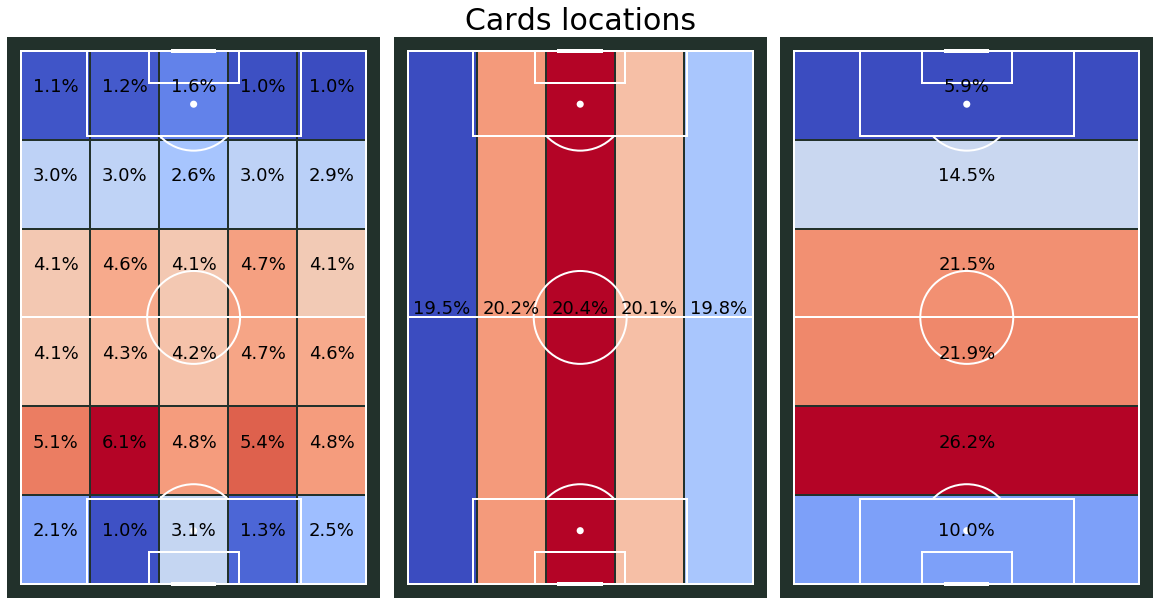

In [12]:
#Cards

from mplsoccer.pitch import Pitch

# setup pitch
pitch = Pitch(pitch_type = 'wyscout', figsize = (16, 9), layout = (1,3), line_zorder=2,
              pitch_color= '#22312b', line_color = 'white',orientation='vertical')
# draw
fig, ax = pitch.draw()
bins = [(6,5),(1,5),(6,1)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(all_games_cards.x, all_games_cards.y, statistic='count', bins = bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[i], cmap='coolwarm', edgecolors = '#22312b')
    
    # replace raw counts with percentages and add percentage sign (note immutable named tuple so used _replace)
    bin_statistic = bin_statistic._replace(statistic = 
                                           (bin_statistic.statistic / len(all_games_cards) * 100)
                                           .round(1).astype(str) + np.char.array(['%']))
    pitch.label_heatmap(bin_statistic, color='black', fontsize=18, ax=ax[i], ha = 'center', va = 'bottom')
fig.suptitle('Cards locations', x=0.5, y=0.98, fontsize=30,);

In [21]:
#Source  : https://www.nature.com/articles/s41597-019-0247-7

def in_match_evolution_faults():

    df_event = pd.DataFrame(all_games, columns=['matchId','matchPeriod','eventSec'])
    
    f, ax = plt.subplots(figsize=(8,6))
    start_bin_label = 1
    max_bin_count = 0
    for half,color_bar,color_last_bar in zip(['1H','2H'],['b','g'],['skyblue','lightgreen']):
        df_half = df_event[df_event['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        bins = range(0,int(df_half['eventSec'].max())+1)[::300]
        labels = range(start_bin_label,start_bin_label+len(bins)-1)
        df_half['binned'] = pd.cut(df_half['eventSec'], bins=bins, labels=labels)
        df_half = df_half.sort_values('binned')
        barlist = plt.bar(Counter(df_half.binned.dropna()).keys(),Counter(df_half.binned.dropna()).values(),label=half,color=color_bar)
        if len(bins) == 11:
            barlist = barlist[len(bins)-2].set_color(color_last_bar)
        max_bin_half = np.max(list(Counter(df_half.binned.dropna()).values()))
        if max_bin_half > max_bin_count:
            max_bin_count = max_bin_half
        start_bin_label = 12
    plt.legend(fontsize=15,frameon=True,shadow=True)
    plt.xticks(list(range(1,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(0,max_bin_count+(max_bin_count/100*10))
    plt.xlim(0,22)
    plt.text(10.65,max_bin_count-(max_bin_count/100*10),'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center',horizontalalignment='left',fontsize=15,color='tomato')
    plt.vlines(11,0,max_bin_count+(max_bin_count/100*10),colors='r',alpha=0.5)
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('Faults', fontsize=25)
    plt.grid(alpha=0.3)
    f.tight_layout()
    plt.show()

In [13]:
def in_match_evolution():
    all_games_yellow = all_games[all_games["card"] == "Yellow Card"]
    all_games_yellow = all_games_yellow[['matchId','matchPeriod','eventSec']]
    df_event = pd.DataFrame(all_games_yellow, columns=['matchId','matchPeriod','eventSec'])
    
    f, ax = plt.subplots(figsize=(8,6))
    start_bin_label = 1
    max_bin_count = 0
    for half,color_bar,color_last_bar in zip(['1H','2H'],['b','g'],['skyblue','lightgreen']):
        df_half = df_event[df_event['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        bins = range(0,int(df_half['eventSec'].max())+1)[::300]
        labels = range(start_bin_label,start_bin_label+len(bins)-1)
        df_half['binned'] = pd.cut(df_half['eventSec'], bins=bins, labels=labels)
        df_half = df_half.sort_values('binned')
        barlist = plt.bar(Counter(df_half.binned.dropna()).keys(),Counter(df_half.binned.dropna()).values(),label=half,color=color_bar)
        if len(bins) == 11:
            barlist = barlist[len(bins)-2].set_color(color_last_bar)
        max_bin_half = np.max(list(Counter(df_half.binned.dropna()).values()))
        if max_bin_half > max_bin_count:
            max_bin_count = max_bin_half
        start_bin_label = 12
    plt.legend(fontsize=15,frameon=True,shadow=True)
    plt.xticks(list(range(1,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(0,max_bin_count+(max_bin_count/100*10))
    plt.xlim(0,22)
    plt.text(10.65,max_bin_count-(max_bin_count/100*10),'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center',horizontalalignment='left',fontsize=15,color='tomato')
    plt.vlines(11,0,max_bin_count+(max_bin_count/100*10),colors='r',alpha=0.5)
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('Yellow Card', fontsize=25)
    plt.grid(alpha=0.3)
    f.tight_layout()
    plt.show()

In [14]:
def in_match_evolution_red():
    all_games_yellow = all_games[all_games["card"] == "Red Card"]
    all_games_yellow = all_games_yellow[['matchId','matchPeriod','eventSec']]
    df_event = pd.DataFrame(all_games_yellow, columns=['matchId','matchPeriod','eventSec'])
    
    f, ax = plt.subplots(figsize=(8,6))
    start_bin_label = 1
    max_bin_count = 0
    for half,color_bar,color_last_bar in zip(['1H','2H'],['b','g'],['skyblue','lightgreen']):
        df_half = df_event[df_event['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        bins = range(0,int(df_half['eventSec'].max())+1)[::300]
        labels = range(start_bin_label,start_bin_label+len(bins)-1)
        df_half['binned'] = pd.cut(df_half['eventSec'], bins=bins, labels=labels)
        df_half = df_half.sort_values('binned')
        barlist = plt.bar(Counter(df_half.binned.dropna()).keys(),Counter(df_half.binned.dropna()).values(),label=half,color=color_bar)
        if len(bins) == 11:
            barlist = barlist[len(bins)-2].set_color(color_last_bar)
        max_bin_half = np.max(list(Counter(df_half.binned.dropna()).values()))
        if max_bin_half > max_bin_count:
            max_bin_count = max_bin_half
        start_bin_label = 12
    plt.legend(fontsize=15,frameon=True,shadow=True)
    plt.xticks(list(range(1,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(0,max_bin_count+(max_bin_count/100*10))
    plt.xlim(0,22)
    plt.text(10.65,max_bin_count-(max_bin_count/100*10),'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center',horizontalalignment='left',fontsize=15,color='tomato')
    plt.vlines(11,0,max_bin_count+(max_bin_count/100*10),colors='r',alpha=0.5)
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('Red Card', fontsize=25)
    plt.grid(alpha=0.3)
    f.tight_layout()
    plt.show()
def in_match_evolution_2nd_Y():
    all_games_yellow = all_games[all_games["card"] == "Second Yellow"]
    all_games_yellow = all_games_yellow[['matchId','matchPeriod','eventSec']]
    df_event = pd.DataFrame(all_games_yellow, columns=['matchId','matchPeriod','eventSec'])
    
    f, ax = plt.subplots(figsize=(8,6))
    start_bin_label = 1
    max_bin_count = 0
    for half,color_bar,color_last_bar in zip(['1H','2H'],['b','g'],['skyblue','lightgreen']):
        df_half = df_event[df_event['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        bins = range(0,int(df_half['eventSec'].max())+1)[::300]
        labels = range(start_bin_label,start_bin_label+len(bins)-1)
        df_half['binned'] = pd.cut(df_half['eventSec'], bins=bins, labels=labels)
        df_half = df_half.sort_values('binned')
        barlist = plt.bar(Counter(df_half.binned.dropna()).keys(),Counter(df_half.binned.dropna()).values(),label=half,color=color_bar)
        if len(bins) == 11:
            barlist = barlist[len(bins)-2].set_color(color_last_bar)
        max_bin_half = np.max(list(Counter(df_half.binned.dropna()).values()))
        if max_bin_half > max_bin_count:
            max_bin_count = max_bin_half
        start_bin_label = 12
    plt.legend(fontsize=15,frameon=True,shadow=True)
    plt.xticks(list(range(1,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(0,max_bin_count+(max_bin_count/100*10))
    plt.xlim(0,22)
    plt.text(10.65,max_bin_count-(max_bin_count/100*10),'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center',horizontalalignment='left',fontsize=15,color='tomato')
    plt.vlines(11,0,max_bin_count+(max_bin_count/100*10),colors='r',alpha=0.5)
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('2nd Yellow Card', fontsize=25)
    plt.grid(alpha=0.3)
    f.tight_layout()
    plt.show()
def in_match_evolution_allCard():
    all_games_cards = all_games[(all_games["card"] == 'Red Card') | (all_games["card"] == 'Yellow Card') | (all_games["card"] == 'Second Yellow')]
    all_games_cards = all_games_cards[['matchId','matchPeriod','eventSec']]
    df_event = pd.DataFrame(all_games_yellow, columns=['matchId','matchPeriod','eventSec'])
    
    f, ax = plt.subplots(figsize=(8,6))
    start_bin_label = 1
    max_bin_count = 0
    for half,color_bar,color_last_bar in zip(['1H','2H'],['b','g'],['skyblue','lightgreen']):
        df_half = df_event[df_event['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        bins = range(0,int(df_half['eventSec'].max())+1)[::300]
        labels = range(start_bin_label,start_bin_label+len(bins)-1)
        df_half['binned'] = pd.cut(df_half['eventSec'], bins=bins, labels=labels)
        df_half = df_half.sort_values('binned')
        barlist = plt.bar(Counter(df_half.binned.dropna()).keys(),Counter(df_half.binned.dropna()).values(),label=half,color=color_bar)
        if len(bins) == 11:
            barlist = barlist[len(bins)-2].set_color(color_last_bar)
        max_bin_half = np.max(list(Counter(df_half.binned.dropna()).values()))
        if max_bin_half > max_bin_count:
            max_bin_count = max_bin_half
        start_bin_label = 12
    plt.legend(fontsize=15,frameon=True,shadow=True)
    plt.xticks(list(range(1,23)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(0,max_bin_count+(max_bin_count/100*10))
    plt.xlim(0,22)
    plt.text(10.65,max_bin_count-(max_bin_count/100*10),'half time',rotation=90,bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center',horizontalalignment='left',fontsize=15,color='tomato')
    plt.vlines(11,0,max_bin_count+(max_bin_count/100*10),colors='r',alpha=0.5)
    plt.xlabel('match time (min)', fontsize=25)
    plt.ylabel('Booking Event', fontsize=25)
    plt.grid(alpha=0.3)
    f.tight_layout()
    plt.show()

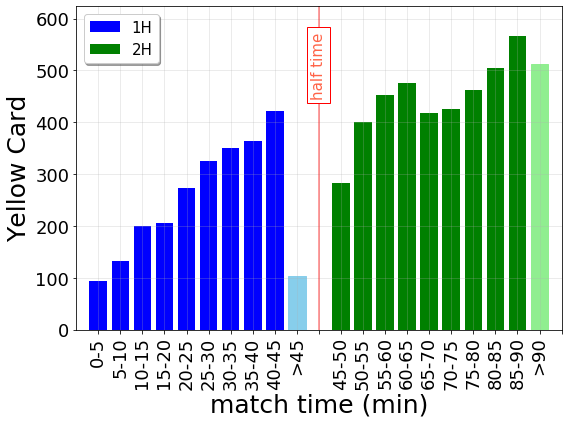

In [15]:
in_match_evolution()

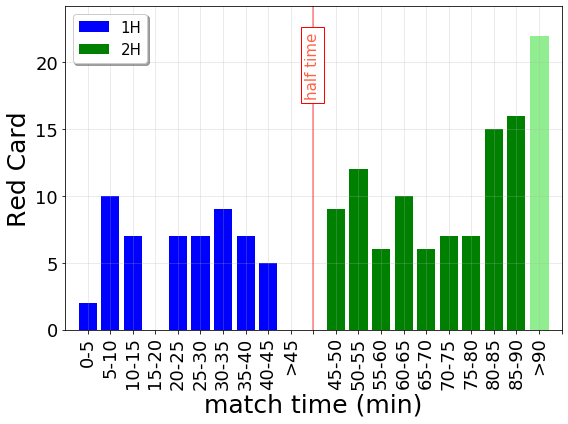

In [16]:
in_match_evolution_red()

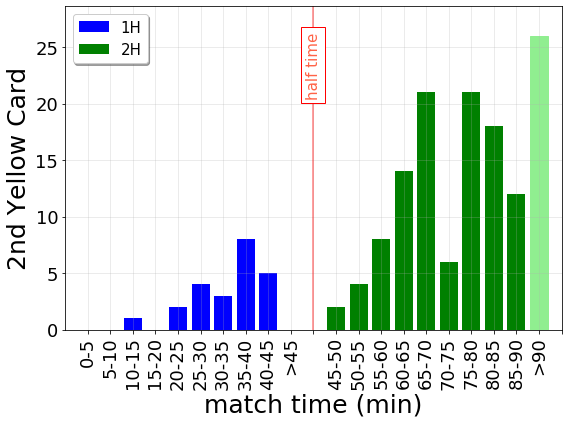

In [17]:
in_match_evolution_2nd_Y()

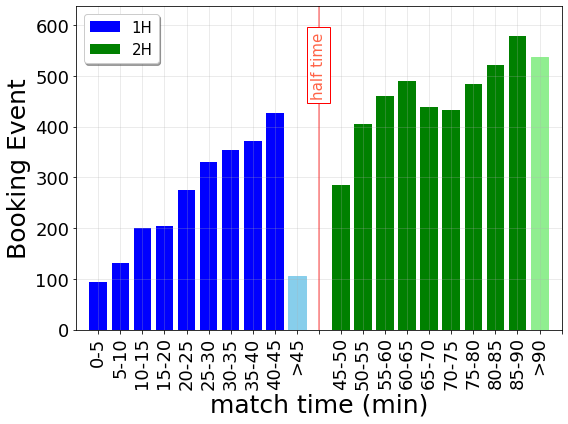

In [18]:
in_match_evolution_allCard()

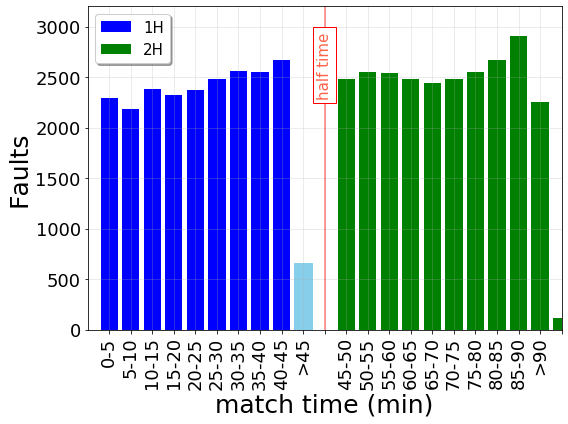

In [22]:
in_match_evolution_faults()